# Assessment Problems

## Imports

In [1]:
# Numerical computing
import numpy as np

# Statistics
import scipy.stats as stats

# Permutations and combinations.
import itertools

# Plotting
import matplotlib.pyplot as plt

# Mathematical functions
import math

# Store data
import collections

# Plots
import matplotlib.pyplot as plt

## Problem 1: Extending the Lady Tasting Tea

### Introduction

The Lady Tasting Tea experiment by Ronald A. Fisher involves a lady tasting 8 cups of tea and attempting to select the 4 cups in which milk was poured first. 

In this problem, we are working with 12 cups of tea - 8 are made with the tea first, 4 with milk first. A participant claims that they can tell which 4 were made with milk first.

**Null Hypothesis:** The participant is just guessing and cannot tell which cups had milk poured in first and which cups had tea poured in first.

**P-value threshold:** 0.05

*See: https://medium.com/data-science/lady-tasting-tea-a-bayesian-approach-1b0b94ca1530*

### Extending the Problem - 4 cups from 12

##### Estimation

In [2]:
# Total number of cups
no_cups = 12

# Number of cups with milk poured first
no_cups_milk_first = 4

# Number of cups with tea poured first
no_cups_tea_first = 8

Now I want to calculate the probability of the participant correctly identifying all cups by chance.

To do this, I must find the number of ways of selecting 4 cups from 12. I found this using the `math.comb` function (the **choose** function).

In [3]:
# Number of ways of selecting four cups from eight
ways = math.comb(no_cups, no_cups_milk_first)

# Show
ways

495

There are 495 ways of choosing 4 cups out of 12. However, only 1 of those 495 is the correct way.

In [4]:
# Calculate probability of correctly identifying all cups by chance
probability = 1 / ways

# Show
probability

0.00202020202020202

The estimated probability of choosing 4 cups out of 12 correctly by chance is **0.00202020...** (about **0.2%** chance)

##### Simulation

I will now simulate the experiment by shuffling the cups and finding how many times out of 100,000 that the correct 4 cups get chosen.

First, I created a list item for the labels of the cups.

Then I shuffled the labels multiple times using the `np.random.shuffle()` function (See: https://numpy.org/doc/2.3/reference/random/generated/numpy.random.shuffle.html)

In [5]:
# Create labels 1-12 for the cups 
labels = list(range(1, no_cups + 1))

# Random seed for reproducibility
np.random.seed(42)

# Shuffle multiple times 
for label in range(20):
    np.random.shuffle(labels)

# Decide which cups have tea poured first and which have milk poured first
tea_first = labels[0:8]
milk_first = labels[8:12]

# Sort the lists for easier reading
tea_first.sort()
milk_first.sort()

# Show
print("Cups with tea poured first:", tea_first, "\nCups with milk poured first:", milk_first)


Cups with tea poured first: [1, 3, 5, 8, 9, 10, 11, 12] 
Cups with milk poured first: [2, 4, 6, 7]


Now that the cups have been shuffled, I am going to see how many times out of 100,000 trials the correct cups are chosen.

The correct cup labels are `2`, `4`, `6` and `7`.

Now I can simulate the experiment and find out how many times 1, 2, 3 or all 4 cups were guessed correctly.

I have adapted the code below from a conversation I had with ChatGPT (See: https://chatgpt.com/share/690f7e85-5580-800c-bff9-2e3903c5923d)

I did 200,000 trials and used the `collections` library to count the number of successes. I used a for loop where 200,000 guesses were made using the `np.random.choice` method and each answer was recorded and counted.

See `np.random.choice` documentation: https://numpy.org/doc/2.1/reference/random/generated/numpy.random.choice.html

In [6]:
# Set number of trials
trials = 200000

# Set random seed
np.random.seed(43)

# Create counter
counts_sim = collections.Counter()

# Loop for each trial
for trial in range(trials):
    guess = np.random.choice(no_cups, size=no_cups_milk_first, replace=False)  # no repeats
    correct = len(set(guess).intersection(milk_first))
    counts_sim[correct] += 1

print("Probability for choosing 4 cups from 12:")
for k in range(0, no_cups_milk_first+1):
    c = counts_sim.get(k, 0)
    print(f"No. cups chosen correctly: {k}: {c} , Probability = {c/trials:.6f}")


Probability for choosing 4 cups from 12:
No. cups chosen correctly: 0: 28418 , Probability = 0.142090
No. cups chosen correctly: 1: 90518 , Probability = 0.452590
No. cups chosen correctly: 2: 67832 , Probability = 0.339160
No. cups chosen correctly: 3: 12829 , Probability = 0.064145
No. cups chosen correctly: 4: 403 , Probability = 0.002015


The correct 4 cups were chosen in **403** of the 200,000 trials completed in this simulation. This makes the probability **0.002015**, which is just lower than the estimated probability of 0.00202 using the `math.comb()` method.

##### Visualisation

Here is the data plotted out as a bar chart:

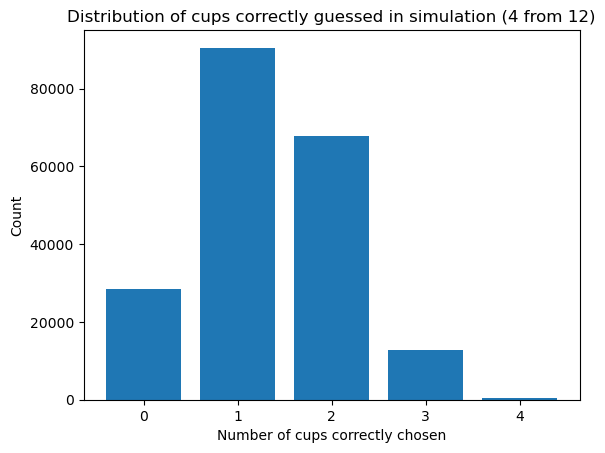

<Figure size 640x480 with 0 Axes>

In [7]:
# Extract keys (k) and counts (c)
k = sorted(counts_sim.keys())
c = [counts_sim[i] for i in k]

# Plot bar chart
plt.bar(k, c)
plt.xlabel("Number of cups correctly chosen")
plt.ylabel("Count")
plt.title("Distribution of cups correctly guessed in simulation (4 from 12)")
plt.xticks(k)
plt.show()
plt.savefig("4from12.png")

### Returning to the original problem - 4 cups from 8

##### Estimation

Now I must compare this to the original experiment where instead of choosing 4 cups from 12, the participant chooses 4 cups from 8. I will recreate the above with 8 cups instead.

In [8]:
# Create new variables for 8-cup experiment
no_cups_new = 8
no_cups_milk_first_new = 4
no_cups_tea_first_new = 4

# Number of ways of selecting 4 cups from 8
ways = math.comb(no_cups_new, no_cups_milk_first_new)

# Show.
ways

70

There are only 70 ways of choosing 4 cups from 8 - much lower than the 495 different combinations of 4 from 12.

In [9]:
# Calculate the probability of correctly identifying all cups by chance
probability = 1 / ways

# Show
probability

0.014285714285714285

The estimated probability of choosing 4 cups from 8 by chance is **0.0142857...** (about a **1.4%** chance)

##### Simulation

Time to shuffle the cups and decide which cups will have milk poured in first.

In [10]:
# Create labels 1-12 for the cups 
labels = list(range(1, no_cups_new + 1))

# Random seed for reproducibility
np.random.seed(44)

# Shuffle multiple times 
for label in range(20):
    np.random.shuffle(labels)

# Decide which cups have tea poured first and which have milk poured first
tea_first_new = labels[0:4]
milk_first_new = labels[4:8]

# Sort the lists for easier reading
tea_first_new.sort()
milk_first_new.sort()

# Show
print("Cups with tea poured first:", tea_first_new, "\nCups with milk poured first:", milk_first_new)

Cups with tea poured first: [1, 2, 4, 8] 
Cups with milk poured first: [3, 5, 6, 7]


In this simulation, the correct cups (with milk poured first) are: cups `3`, `5`, `6` and `7`.

In [11]:
# Set number of trials
trials = 200000

# Set random seed
np.random.seed(45)

# Create counter
counts_sim = collections.Counter()

# Loop for each trial
for trial in range(trials):
    guess = np.random.choice(no_cups_new, size=no_cups_milk_first_new, replace=False)  # no repeats
    correct = len(set(guess).intersection(milk_first_new))
    counts_sim[correct] += 1

print("Probability for choosing 4 cups from 8:")
for k in range(0, no_cups_milk_first_new+1):
    c = counts_sim.get(k, 0)
    print(f"No. cups chosen correctly: {k}: {c} , Probability = {c/trials:.6f}")

Probability for choosing 4 cups from 8:
No. cups chosen correctly: 0: 2905 , Probability = 0.014525
No. cups chosen correctly: 1: 45972 , Probability = 0.229860
No. cups chosen correctly: 2: 102547 , Probability = 0.512735
No. cups chosen correctly: 3: 45779 , Probability = 0.228895
No. cups chosen correctly: 4: 2797 , Probability = 0.013985


The results show that the correct cups were chosen in **2,797** out of the 200,000 simulated trials. This makes it a probability of **0.013985** (around **1.4%** chance) that all 4 cups are chosen from 8 - just less than the estimated 0.142857.

##### Visualisation

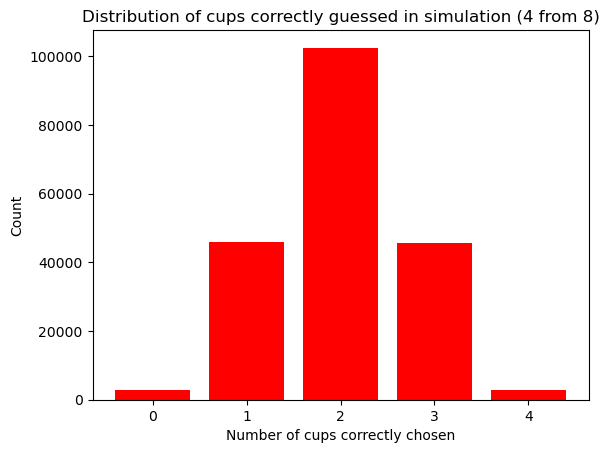

<Figure size 640x480 with 0 Axes>

In [12]:
# Extract keys (k) and counts (c)
k = sorted(counts_sim.keys())
c = [counts_sim[i] for i in k]

# Plot bar chart
plt.bar(k, c, color="red")
plt.xlabel("Number of cups correctly chosen")
plt.ylabel("Count")
plt.title("Distribution of cups correctly guessed in simulation (4 from 8)")
plt.xticks(k)
plt.show()
plt.savefig("4from8.png")

### Conclusion

##### Results

**Extended Problem (4 cups from 12)**
- *Estimated p-value:* 0.0020202...
- *Simulated p-value:* 0.002015

**Original Problem (4 cups from 8)**
- *Estimated p-value:* 0.014286...
- *Simulated p-value:* 0.013985...

##### P-value threshold - extend or relax?

- The **null hypothesis** *(H0)* was that the participant is randomly guessing and has no special ability to detect milk-first cups from tea-first cups.

- The standard **p-value threshold** is 0.05 or 5% probability. If our p-value is **less** than this threshold, we reject the null hypothesis.

- For the 12-cup problem, the p-value was 0.002 or 0.2% probability.

- 0.002 < 0.05, showing that the p-value threshold has further potential to be extended/tightened. I would consider **reducing** the p-value threshold to 0.01 or even lower, depending on sample size.

## Problem 2: Normal Distribution

In this problem, I am investigating Normal Distribution.

- First I will generate 100,000 samples of size 10 from the standard normal distribution. 

- For each sample, I must compute the standard deviation with ddof=1 (sample SD) and with ddof=0 (population SD). 

- Plot histograms of both sets of values on the same axes with transparency and describe the differences I see. Explain how I expect these differences to change if the sample size is increased.

In [13]:
# Set random seed for reproducibility
np.random.seed(0)

# Generate 100,000 samples of size 10 from the standard normal distribution.
sample = np.random.normal(size=(100000, 10))

sample

array([[ 1.76405235,  0.40015721,  0.97873798, ..., -0.15135721,
        -0.10321885,  0.4105985 ],
       [ 0.14404357,  1.45427351,  0.76103773, ..., -0.20515826,
         0.3130677 , -0.85409574],
       [-2.55298982,  0.6536186 ,  0.8644362 , ..., -0.18718385,
         1.53277921,  1.46935877],
       ...,
       [-0.54498226, -0.88424386, -0.54123384, ...,  0.17979725,
         0.10406507, -1.62049801],
       [ 2.4904749 ,  0.78525304, -0.11639057, ...,  0.65395555,
         0.04834668, -0.17896953],
       [-0.72501795,  1.32550567,  0.41403245, ..., -0.79728264,
         0.87475609,  1.37183066]])

I wasn't sure how to find the standard deviation and how to make a transparent plot. I used ChatGPT to help me (See: https://chatgpt.com/share/691b2267-2d10-800c-9a24-fe39970893b9)

In [14]:
# Compute standard deviations
sd_ddof1 = np.std(sample, axis=1, ddof=1)  # sample SD
sd_ddof0 = np.std(sample, axis=1, ddof=0)  # population SD

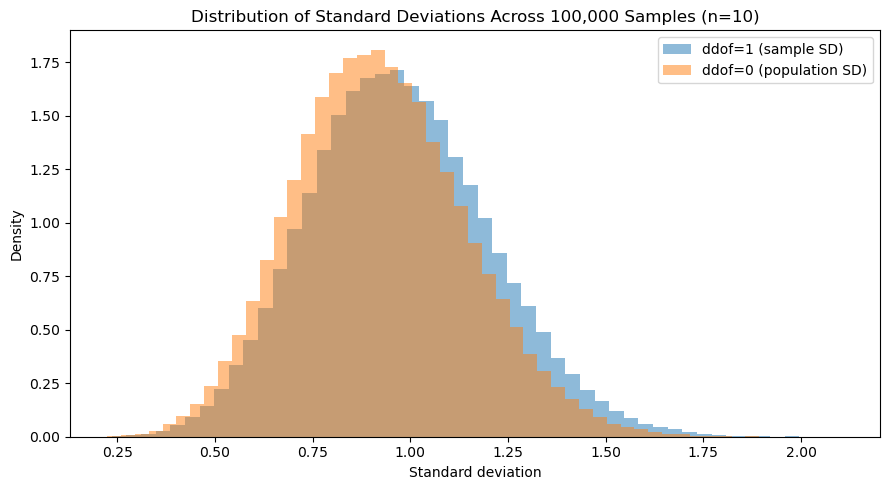

In [15]:
# Plot histograms
plt.figure(figsize=(9,5))
bins = 50

plt.hist(sd_ddof1, bins=bins, alpha=0.5, density=True, label="ddof=1 (sample SD)")
plt.hist(sd_ddof0, bins=bins, alpha=0.5, density=True, label="ddof=0 (population SD)")

plt.xlabel("Standard deviation")
plt.ylabel("Density")
plt.title("Distribution of Standard Deviations Across 100,000 Samples (n=10)")
plt.legend()
plt.tight_layout()
plt.show()

From the above plot, we can see that the sample standard deviation looks like a more symmetrical bell curve, showing a more standard normal distribution.

The population standard deviation is skewed to the left, conveying that the standard deviation was generally lower across all data points.

## Problem 3: t-Tests

For each mean difference d = 0, 0.1, 0.2, ... , 1.0, repeat the following simulation 1,000 times:
- Draw two samples of size 100, one from the standard normal distribution and one from the normal distribution with mean d and standard deviation 1.

- Run an independent samples t-test on the two samples, rejecting the null hypothesis if the p-value is less than 0.05.

- Record the proportion of times the null hypothesis is not rejected.

- Plot this proportion against d, and explain how the type II error rate changes as the difference in means increases.

In [ ]:
# Draw 2 sample groups
# One with standard normal deviation
sample1 = np.random.standard_normal(size=100)
# And one with normal deviation
sample2 = np.random.normal(size=100)

## Problem 4: ANOVA

## End